In [1]:
import numpy as np, healpy as hp, plottools as pl, local, tools_cmb, quad_func, binning as bn, analysis as ana
from matplotlib.pyplot import *
import warnings
warnings.filterwarnings("ignore")

In [2]:
def plot_spec(qobj,rlz=None,cn=1,lmin=40,lmax=2048,bnum=10,output=True):
    mb = bn.multipole_binning(bnum,lmin=lmin,lmax=lmax)
    Skk, __, nb = local.load_spec(qobj,mb,rlz=rlz,cn=cn,outN0=True)
    Mkk = np.mean(Skk,axis=0)
    Vkk = np.std(Skk,axis=0)
    print(np.sqrt(np.sum(Mkk**2/Vkk**2)))
    st = ana.amplitude(Mkk,Skk,fcb=None,diag=False,disp=True)
    # plot binned spectrum lin-scale
    pl.plot_1dstyle(fsize=[10,4],xmin=mb.lmin,xmax=lmax,ylab='$C_L^{\kappa\kappa}$')
    errorbar(mb.bc+5,Mkk,yerr=Vkk,fmt='o')
    plot(aobj.l,aobj.ckk,color='k',ls='--')
    axhline(0,color='k')
    show()
    if output: return mb, Mkk, Vkk, nb

In [3]:
def plot_bias(qobj,cn=1):
    pl.plot_1dstyle(fsize=[10,4],xmin=2,xmax=2048,ymin=1e-9,ymax=1e-4,ylog=True,ylab='$C_L^{\kappa\kappa}$')
    l, al = (np.loadtxt(qobj.f['TT'].al,usecols=(0,cn))).T
    l, n0 = (np.loadtxt(qobj.f['TT'].n0bs,usecols=(0,cn))).T
    l, ml = (np.loadtxt(qobj.f['TT'].ml[1],usecols=(0,cn))).T
    l, cl = (np.loadtxt(qobj.f['TT'].mcls,usecols=(0,cn))).T
    plot(l,al,label='norm')
    plot(l,n0,label='N0')
    plot(l,ml,label='MF')
    plot(l,cl/99.,label='MF-MC')
    legend()

In [4]:
dirs = local.data_directory()
qobj, Qobj = {}, {}
for wtype in ['com16v0pt','com16v3pt','com16v0PT']:
    aobj = local.init_analysis_params(qid='comb_dn',ascale=3.,wtype=wtype)
    qobj[wtype] = quad_func.reconstruction(dirs['local'],aobj.ids,stag=aobj.stag,rlmin=500,qlist=['TT'],bhe=['src'])
    Qobj[wtype] = quad_func.reconstruction(dirs['local'],aobj.ids,stag=aobj.stag,rlmin=500,qlist=['TT'])

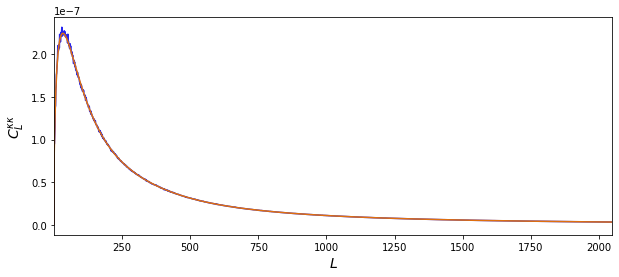

In [8]:
l, xl = (np.loadtxt(qobj['com16v0pt'].f['TT'].mcls,usecols=(0,4))).T
pl.plot_1dstyle(fsize=[10,4],xmin=2,xmax=2048,ylab='$C_L^{\kappa\kappa}$')
plot(qobj['com16v0pt'].l,xl)
plot(aobj.l,aobj.ckk)

11.497696098568392
obs A 1.0 mean(A) 1.001 sigma(A) 0.117 S/N 8.529 A>oA 0.94


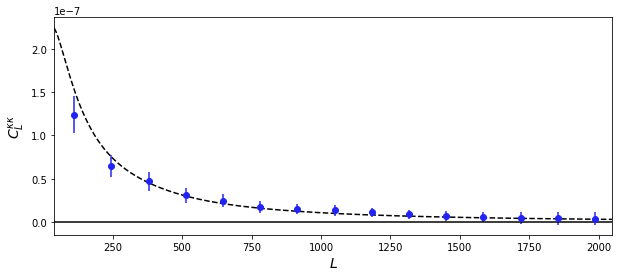

In [9]:
mb, mkk, vkk, nb = plot_spec(qobj['com16v0pt'],cn=1,bnum=15)

11.180645761785382
obs A 1.0 mean(A) 1.002 sigma(A) 0.124 S/N 8.074 A>oA 0.8799999999999999


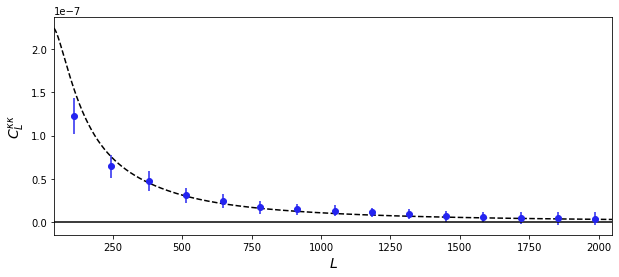

In [5]:
mb, mkk, vkk, nb = plot_spec(qobj['com16v0PT'],cn=1,bnum=15)

12.9619190182483
obs A 1.0 mean(A) 1.001 sigma(A) 0.098 S/N 10.177 A>oA 0.9199999999999999


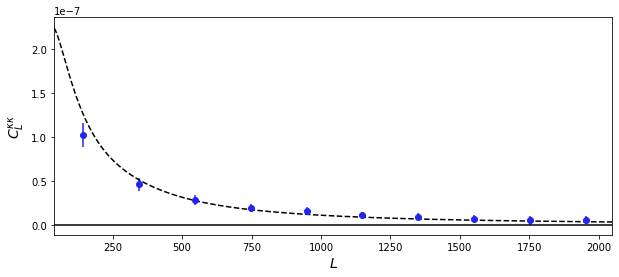

In [19]:
mb, mkk, vkk, nb = plot_spec(Qobj['com16v0pt'],cn=1,bnum=10,rlz=aobj.rlz[:101])

12.295735520013961
obs A 1.0 mean(A) 1.0 sigma(A) 0.104 S/N 9.615 A>oA 0.96


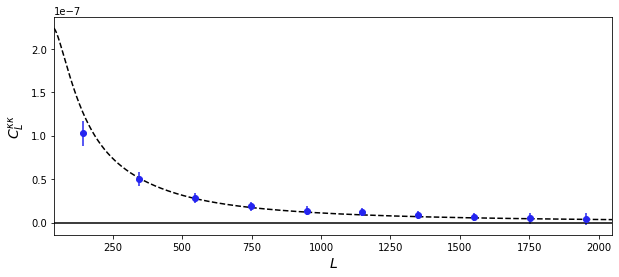

11.974320004612704
obs A 1.0 mean(A) 1.0 sigma(A) 0.107 S/N 9.305 A>oA 1.0


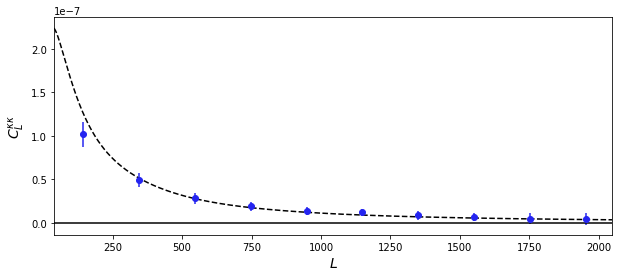

In [8]:
mb, mkk, vkk, nb = plot_spec(Qobj['com16v0pt'],cn=1,bnum=10)
mb, mkk, vkk, nb = plot_spec(Qobj['com16v0PT'],cn=1,bnum=10)

10.381431253874577
obs A 1.0 mean(A) 1.001 sigma(A) 0.129 S/N 7.769 A>oA 0.96


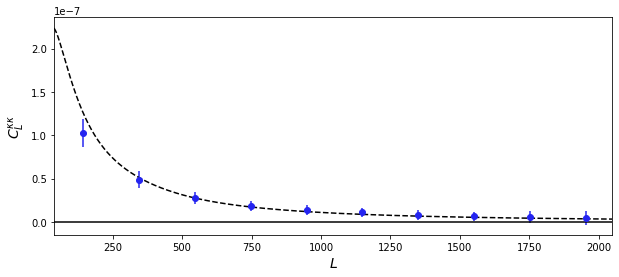

In [11]:
mb, mkk, vkk, nb = plot_spec(Qobj['com16v3pt'],cn=1,bnum=10)

In [12]:
w = {wtype: tools_cmb.get_wfactors(['comb_dn'],3.,wtype=wtype,wnmax=9)['comb_dn'] for wtype in ['iso15vcpt','iso15v3pt','com16v3pt','com16v0pt']}

wfactors: [2.64551209e-02 4.43198474e-08 1.08375184e-13 2.89033159e-19
 8.10469432e-25 2.35988528e-30 7.08640133e-36 2.18366795e-41
 6.87728402e-47]
wfactors: [2.64897241e-02 7.90728095e-07 3.63343224e-11 1.90522948e-15
 1.09009040e-19 6.65856188e-24 4.27076471e-28 2.83820285e-32
 1.93443306e-36]
wfactors: [1.98779519e-02 1.17519756e-06 8.70375332e-11 6.86867112e-15
 5.62093631e-19 4.71549566e-23 4.02923428e-27 3.49244992e-31
 3.06253144e-35]
wfactors: [0.01995713 0.01550079 0.01450246 0.01400757 0.01369619 0.01347588
 0.01330874 0.01317591 0.01306681]


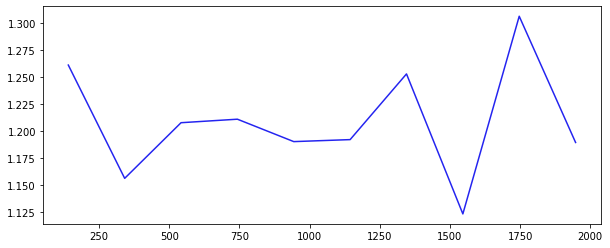

In [18]:
plot(mb.bc,vkk/(mkk+nb)*np.sqrt((mb.bc+.5)*2000./mb.n)*np.sqrt(w['com16v0pt'][0]))

In [14]:
np.sqrt(w['com16v0pt'][8]/w['com16v0pt'][0])/(w['com16v0pt'][4]/w['com16v0pt'][0])

1.1790547785589973

In [15]:
w['com16v0pt'][0]

0.019957129255971387

In [16]:
1/(w['com16v0pt'][8]/(w['com16v0pt'][4])**2)

0.014355889426020528